In [5]:
%matplotlib notebook
from ipywidgets import *
from IPython.display import display, Math

import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg as la
from timeit import default_timer as timer
from datetime import datetime
import itertools
from scipy import sparse, constants, fft
from scipy.sparse import linalg as sla
from matplotlib.ticker import FuncFormatter

Paulis = ((     # maybe make this a function?
    np.array([[1,0],[0,1]]),
    np.array([[0,1],[1,0]]),
    np.array([[0,-1j],[1j,0]]),
    np.array([[1,0],[0,-1]])
    ))


def PauliProduct(v):
    """
    Kronecker product of a sequence of Pauli matrices, indicated by the vector v.
    The output is Paulis[v[0]] \otimes Paulis[v[1]] \otimes ... 
    """
    if len(v)==1:
        return Paulis[v[0]]
    return la.kron(Paulis[v[0]],PauliProduct(v[1:len(v)]))

def hc(A):
    """
    Hermitian conjugate of a matrix.
    """
    return np.conj(A.T)

<IPython.core.display.Javascript object>


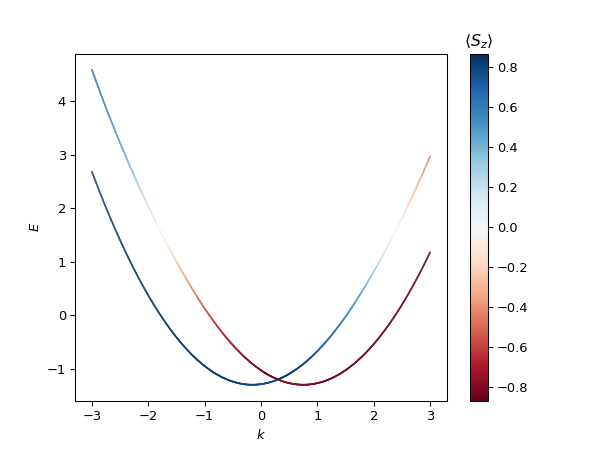

In [9]:
m = 1
alpha = 0.5
alpha_p = 0.6
t = 1
q = 0.3
w = 0.3

k = 3*np.linspace(-1, 1, 1001)

E_mat = np.zeros((len(k), 4))
spin_EV = np.zeros((len(k), 4, 3))

for j, kx in enumerate(k):
    H = ((kx-q)**2)/(2*m)*np.eye(4) - t*PauliProduct([1, 0]) +\
        alpha*(kx-q)*PauliProduct([0, 3]) + alpha_p*PauliProduct([2, 1]) +\
        w*PauliProduct([3, 0])
    E_mat[j, :], Psi = la.eigh(H)
    for s in range(3):
        spin_EV[j, :, s] = np.real(np.diag(hc(Psi)@(PauliProduct([0, s+1])@Psi)))

which_spin = 3


plt.figure(dpi=75)
for j in range(2):
    plt.scatter(k, E_mat[:, j], s=0.1, c=spin_EV[:, j, which_spin-1], cmap='RdBu')
cbar = plt.colorbar()
plt.xlabel(r'$k$'); plt.ylabel(r'$E$')
cbar.ax.set_title(r'$\left\langleS_%s\right\rangle$' % (
    'x' if which_spin==1 else ('y' if which_spin==2 else 'z')));